In [1]:
#--------importing Required modules----------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#No Non Null values found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df["target"]

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


Analyze overfitting and control tree depth

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

depths = range(1, 11)
train_accuracies = []
test_accuracies = []

for each_depth in depths:
    model = DecisionTreeClassifier(max_depth=each_depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))


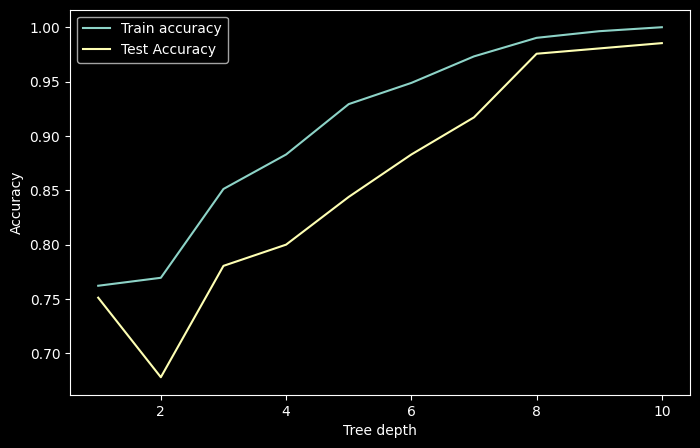

In [35]:
# depth vs accuracy
plt.figure(figsize=(8,5))
plt.plot(depths , train_accuracies , label = "Train accuracy")
plt.plot(depths , test_accuracies , label ="Test Accuracy")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dt_model.fit(X_train , y_train)
y_pred = dt_model.predict(X_test)

print(f"Testing data accuracy : {accuracy_score(y_test , y_pred) * 100 : .2f} %")

print(f"Training data accuracy : {dt_model.score(X_train, y_train) * 100 : .2f} %")


Testing data accuracy :  98.54 %
Training data accuracy :  100.00 %


In [50]:
# Feature importances
dt_model.fit(X_train, y_train)
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)

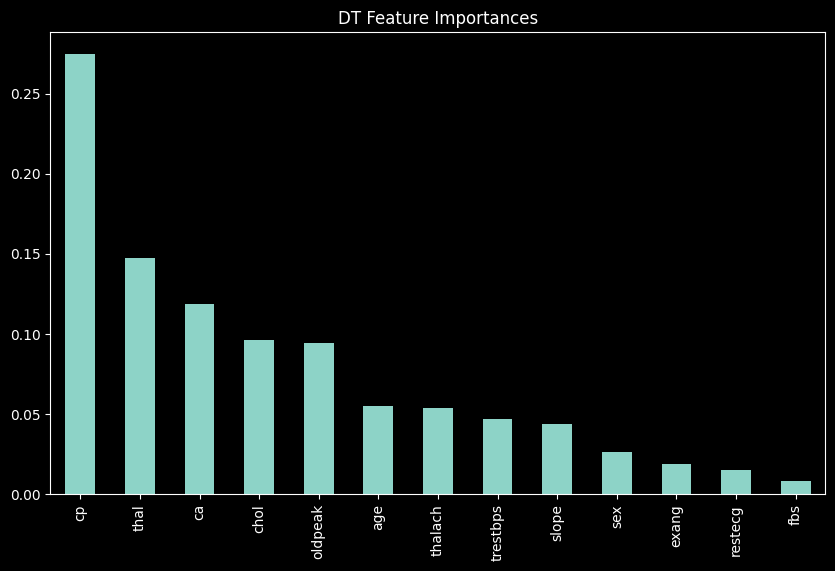

In [51]:
plt.figure(figsize=(10, 6))
dt_importances.sort_values(ascending=False).plot(kind='bar', title='DT Feature Importances')
plt.show()

Cross-validation score

In [53]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print(f"DT Mean Accuracy: {dt_scores.mean():.3f}")

DT Mean Accuracy: 1.000
